# Machine learning for biofilm data

# Import Libraries
Import the usual libraries for pandas and plotting. You can import sklearn later on.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Get the Data

** Use pandas to read ExtractedFeatures_all.csv as a dataframe called data.**

In [2]:
data1 = pd.read_csv('ExtractedFeatures_standardized_InVitro_MonoB_Training.csv')

** Check out the info(), head(), and describe() methods on data.**

In [3]:
data1.keys()

Index(['Mean', 'SD', 'Entropy', 'RMS', 'Kurtosis', 'Skewness', 'GLCM1',
       'GLCM2', 'GLCM3', 'GLCM4', 'GLCM5', 'GLCM6', 'GLCM7', 'GLCM8', 'GLCM9',
       'GLCM10', 'GLCM11', 'GLCM12', 'GLCM13', 'GLCM14', 'GLCM15', 'GLCM16',
       'GLCM17', 'GLCM18', 'LBP1', 'LBP2', 'LBP3', 'LBP4', 'LBP5', 'LBP6',
       'LBP7', 'LBP8', 'LBP9', 'LBP10', 'Label'],
      dtype='object')

In [4]:
print(data1['Label'])

0       HFB
1       HFB
2       HFB
3       HFB
4       HFB
       ... 
4995    SPB
4996    SPB
4997    SPB
4998    SPB
4999    SPB
Name: Label, Length: 5000, dtype: object


In [5]:
data1.describe()

,Mean,SD,Entropy,RMS,Kurtosis,Skewness,GLCM1,GLCM2,GLCM3,GLCM4,...,LBP1,LBP2,LBP3,LBP4,LBP5,LBP6,LBP7,LBP8,LBP9,LBP10
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.032799,0.096077,0.081342,-0.082138,0.077215,0.081772,0.066670,0.062713,0.088863,0.076157,...,-0.038476,-0.007739,-0.048717,0.023747,0.051774,0.015243,-0.040220,-0.094079,0.019059,-0.046448
std,0.999730,1.009528,0.994875,0.917837,1.031428,1.005400,1.017148,0.991063,0.975136,1.052608,...,0.969615,0.992469,1.015023,0.974649,0.983420,0.975271,0.924840,0.980025,0.978934,0.980524
min,-2.832218,-2.042955,-3.034173,-3.306187,-1.945913,-1.767257,-1.640993,-2.304767,-4.374324,-0.976784,...,-4.140227,-9.563809,-9.135800,-4.096251,-3.524551,-4.508172,-5.256574,-9.751189,-4.236972,-5.603814
25%,-0.618392,-0.610167,-0.552848,-0.745749,-0.486556,-0.641783,-0.670316,-0.677414,-0.478899,-0.417552,...,-0.732982,-0.601774,-0.705331,-0.608758,-0.640777,-0.626617,-0.655679,-0.676255,-0.719844,-0.776374
50%,0.042898,0.006844,0.149770,-0.076598,-0.228184,-0.105066,-0.032270,0.126199,0.154992,-0.192368,...,-0.216291,0.032746,-0.034089,0.185258,0.182568,0.112527,0.018800,-0.063518,-0.116060,-0.171409
75%,0.674051,0.589582,0.702692,0.573872,0.438481,0.646096,0.580576,0.814994,0.679061,0.177285,...,0.671595,0.653298,0.621637,0.723739,0.779342,0.669787,0.612077,0.522758,0.744077,0.709266
max,5.134343,5.785962,3.697522,2.842157,15.528410,8.745649,5.929200,3.516487,3.445425,14.118107,...,4.212088,2.867139,3.584903,2.994803,5.084974,4.575143,3.351600,3.814038,3.750347,3.596551


In [6]:
data1.head()

,Mean,SD,Entropy,RMS,Kurtosis,Skewness,GLCM1,GLCM2,GLCM3,GLCM4,...,LBP2,LBP3,LBP4,LBP5,LBP6,LBP7,LBP8,LBP9,LBP10,Label
0,2.030570,1.910645,1.763380,-1.106532,-0.298925,0.060138,2.136146,1.825162,0.959103,1.372025,...,1.352792,-0.229456,-0.285086,-0.252029,-1.501633,-1.486186,0.619805,0.904297,0.537212,HFB
1,2.540950,2.035585,2.021876,-0.427589,0.021946,0.280804,2.467825,2.013120,1.186707,2.363135,...,1.440689,-1.398388,-0.342024,-0.594918,-1.067771,-1.290755,1.069021,0.654516,0.751853,HFB
2,2.130183,2.011535,1.849540,-0.733343,0.807084,0.916084,2.192809,1.850896,1.290191,3.207098,...,1.236149,0.075863,-0.792273,-0.716795,-1.110095,-1.658564,1.554926,0.889386,0.798461,HFB
3,1.971550,1.953266,1.775731,-0.842897,0.726709,0.988045,2.089074,1.889163,1.223390,2.992815,...,2.138237,0.183480,-0.713386,-0.542280,-1.392077,-1.344933,0.888508,0.793877,0.693045,HFB
4,-0.392299,0.166806,0.002802,-2.024223,-0.593638,-0.207614,-0.130717,0.261630,-0.361021,-0.493872,...,1.736367,0.139826,-2.355790,-2.015931,-1.532237,-1.476702,-1.181700,2.344510,1.340334,HFB


# VISUALIZING THE DATA

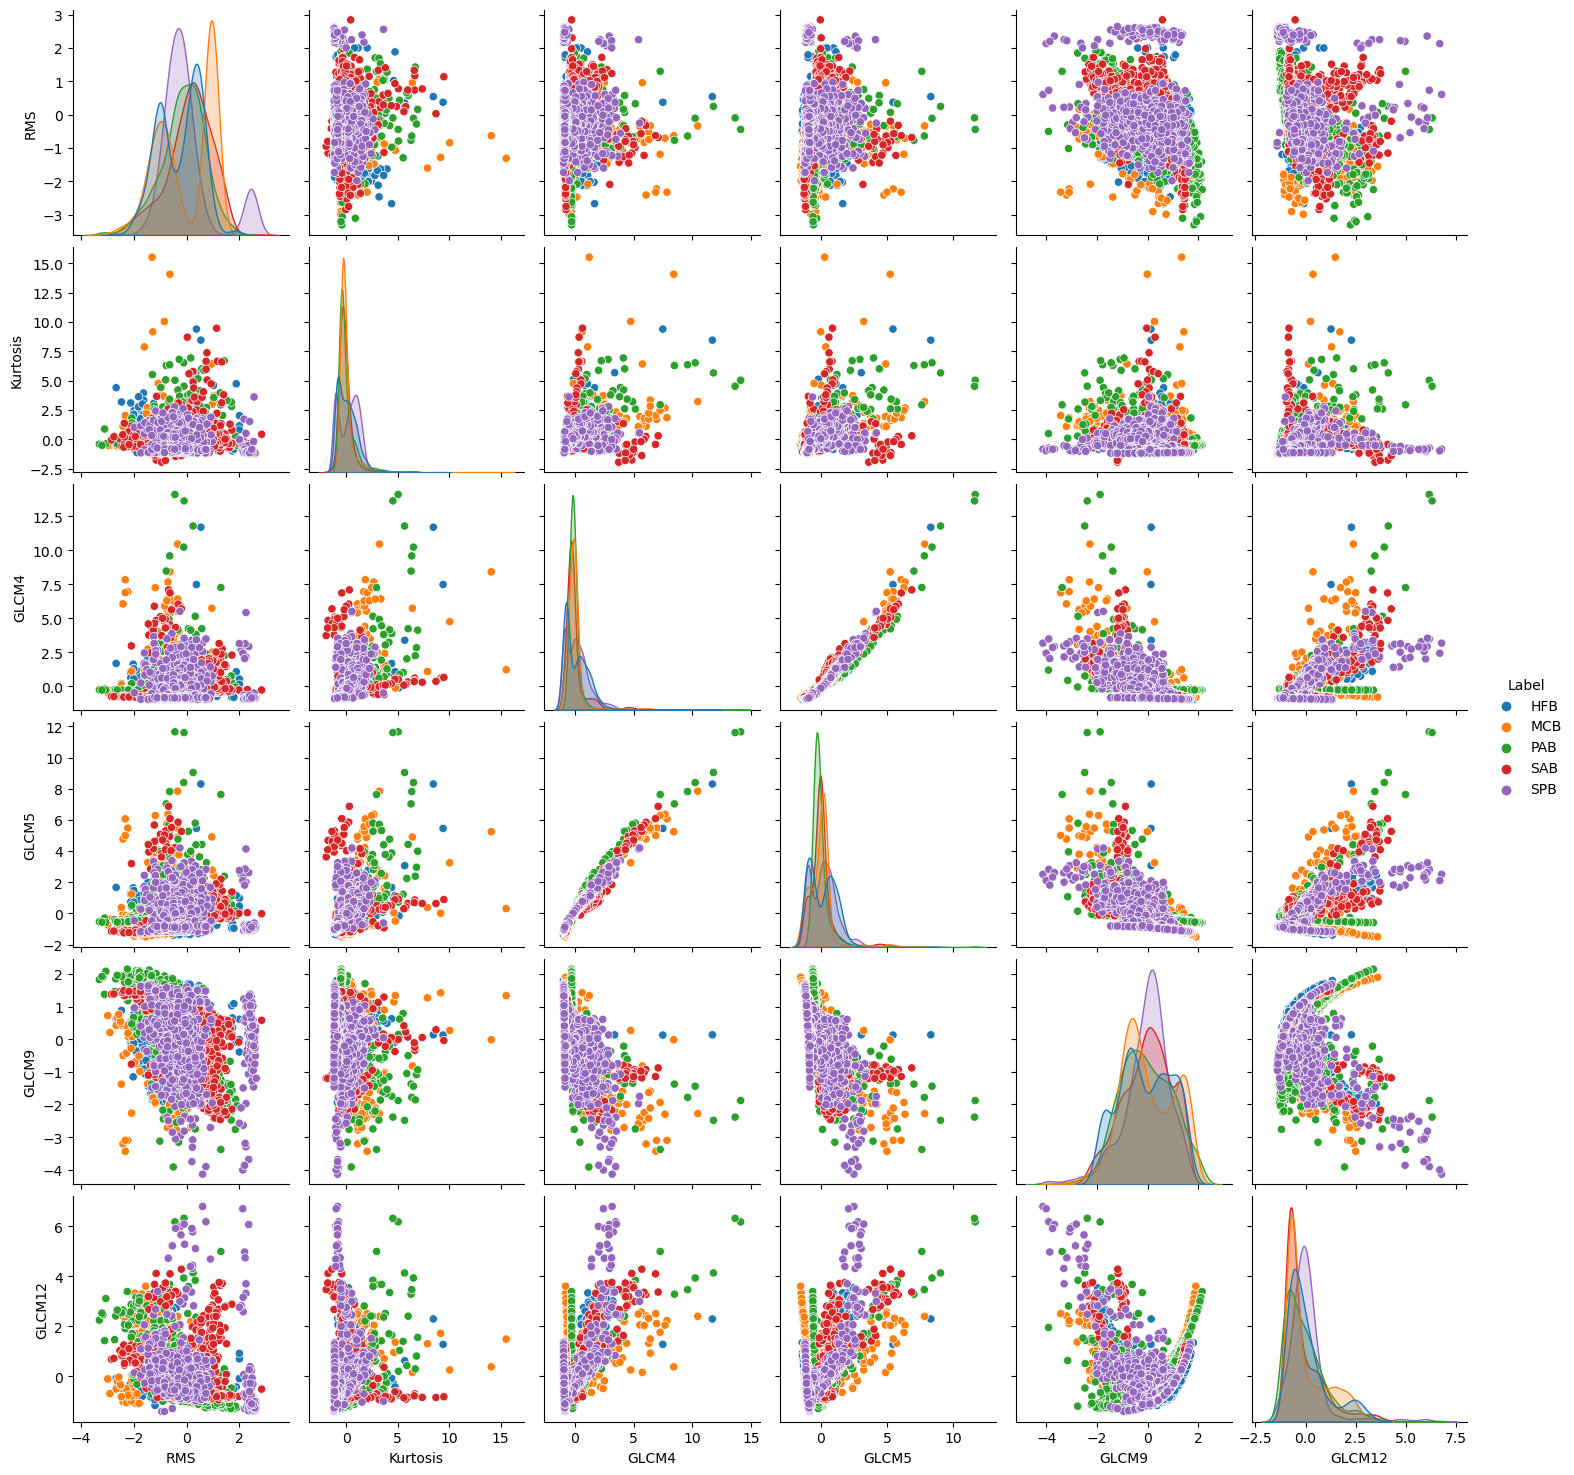

In [7]:
sns.pairplot(data1, hue = 'Label', vars = ['RMS', 'Kurtosis', 'GLCM4', 'GLCM5', 'GLCM9','GLCM12'] )

<AxesSubplot:xlabel='GLCM4', ylabel='GLCM5'>

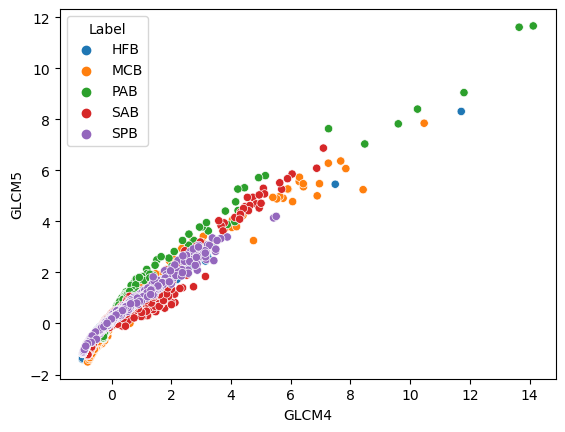

In [8]:
sns.scatterplot(x = 'GLCM4', y = 'GLCM5', hue = 'Label', data = data1)

<AxesSubplot:>

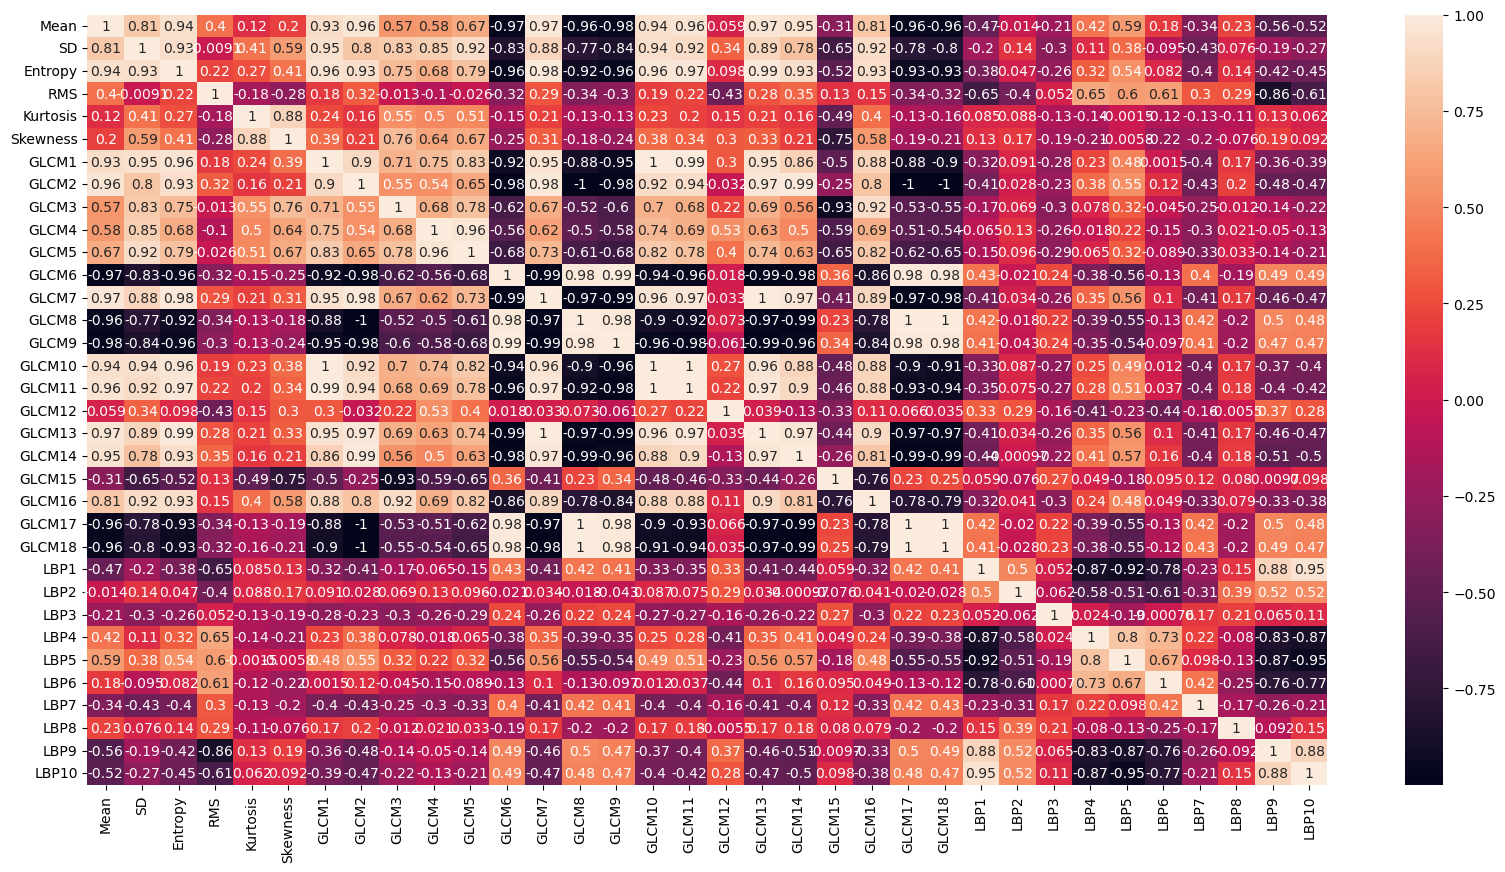

In [9]:
# Let's check the correlation between the variables 
# Strong correlation between the mean radius and mean perimeter, mean area and mean primeter
plt.figure(figsize=(20,10)) 
sns.heatmap(data1.corr(), annot=True) 

# Train Test Split
Now its time to split our data into a training set and a testing set!

** Use sklearn to split your data into a training set and a testing set as we've done in the past.**

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
#X = data1.drop('Label',axis=1)
#y = data['Label']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

# manually defining 1000 training and 200 test data 

In [9]:
X = data1.drop('Label',axis=1)
y = data1['Label']
X_train = X #training data
y_train = y #training label
X_train
y_train

0       HFB
1       HFB
2       HFB
3       HFB
4       HFB
       ... 
4995    SPB
4996    SPB
4997    SPB
4998    SPB
4999    SPB
Name: Label, Length: 5000, dtype: object

In [10]:
data2 = pd.read_csv('ExtractedFeatures_standardized_InVitro_MonoB_Testing.csv')
#data2 = pd.read_csv('ExtractedFeatures_standardized_HFB_SPB.csv')
X2 = data2.drop('Label',axis=1)
y2 = data2['Label']
X_test = X2 #testing data
y_test = y2 #testing label
X_test
y_test

0      HFB
1      HFB
2      HFB
3      HFB
4      HFB
      ... 
995    SPB
996    SPB
997    SPB
998    SPB
999    SPB
Name: Label, Length: 1000, dtype: object

# (i)Training a Decision Tree Model
Let's start by training a single decision tree first!

** Import DecisionTreeClassifier**

In [11]:
from sklearn.tree import DecisionTreeClassifier

Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.

In [12]:
dtree = DecisionTreeClassifier() #clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

In [13]:
dtree.fit(X_train,y_train) #clf_gini.fit(X_train, y_train)

DecisionTreeClassifier()

Traing performance evaluation: 5-fold CV and cross validation accuracy

In [14]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(dtree, X_train,y_train, cv=5, scoring="accuracy")

print(f'Scores for each fold are: {score}')
print(f'Cross validation accuracy: {"{:.2f}".format(score.mean())}')
print(f'Cross validation std: {"{:.2f}".format(score.std())}')


Scores for each fold are: [0.645 0.881 0.859 0.802 0.786]
Cross validation accuracy: 0.79
Cross validation accuracy: 0.08


# Predictions and Evaluation of Decision Tree
Create predictions from the test set and create a classification report and a confusion matrix.

In [15]:
predictions = dtree.predict(X_test) #y_pred_gini = clf_gini.predict(X_test)


In [16]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, predictions)))



Model accuracy score: 0.8090


In [17]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         HFB       0.72      0.88      0.79       200
         MCB       0.88      0.69      0.78       200
         PAB       0.86      0.82      0.84       200
         SAB       0.84      0.72      0.78       200
         SPB       0.79      0.92      0.85       200

    accuracy                           0.81      1000
   macro avg       0.82      0.81      0.81      1000
weighted avg       0.82      0.81      0.81      1000



In [18]:
print(confusion_matrix(y_test,predictions))

[[176   3   2   4  15]
 [ 10 139  22  16  13]
 [  8  10 165   7  10]
 [ 36   6   3 145  10]
 [ 16   0   0   0 184]]


<AxesSubplot:>

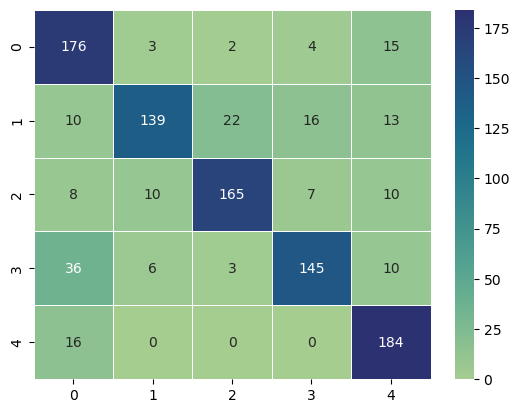

In [19]:
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, cmap="crest", linewidth=.5,fmt=".0f")

In [20]:
from sklearn.metrics import roc_curve, auc


# (ii)Training the Random Forest model
Now its time to train our model!

Create an instance of the RandomForestClassifier class and fit it to our training data from the previous step.

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
rfc = RandomForestClassifier(n_estimators=600)

In [23]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

# Determine feature importance values

In [24]:
import numpy as np
 
importances = rfc.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]
 
feat_labels = data1.columns[1:]
 
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))

 1) GLCM5                          0.110234
 2) GLCM6                          0.075989
 3) Skewness                       0.068887
 4) GLCM13                         0.063248
 5) Kurtosis                       0.062037
 6) GLCM4                          0.050993
 7) GLCM16                         0.038704
 8) GLCM1                          0.038170
 9) LBP2                           0.035083
10) Label                          0.033284
11) LBP10                          0.030584
12) LBP6                           0.030423
13) Entropy                        0.027097
14) LBP7                           0.026510
15) GLCM17                         0.025978
16) GLCM2                          0.022780
17) GLCM11                         0.019607
18) SD                             0.018097
19) GLCM12                         0.017298
20) GLCM10                         0.016638
21) RMS                            0.016445
22) LBP8                           0.016443
23) GLCM15                      

# Visualize the feature importance

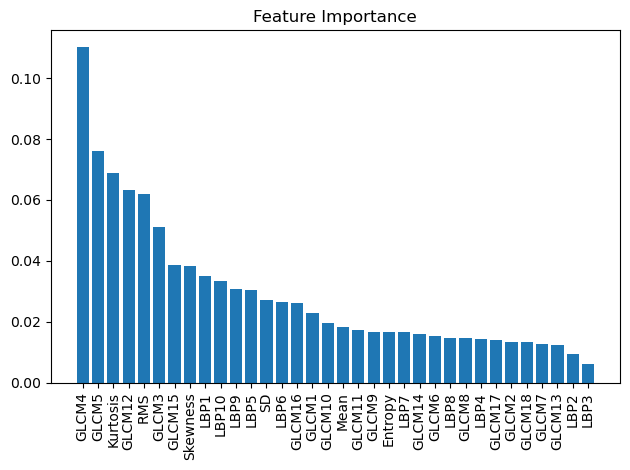

In [25]:
import matplotlib.pyplot as plt
 
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

# Predictions and Evaluation
Let's predict off the y_test values and evaluate our model.

** Predict the class of not.fully.paid for the X_test data.**

In [26]:
predictions = rfc.predict(X_test)

Now create a classification report from the results.

In [27]:
from sklearn.metrics import classification_report,confusion_matrix

In [28]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         HFB       0.83      0.98      0.90       200
         MCB       0.91      0.77      0.83       200
         PAB       0.89      0.99      0.94       200
         SAB       0.93      0.76      0.83       200
         SPB       0.96      0.99      0.97       200

    accuracy                           0.90      1000
   macro avg       0.90      0.90      0.89      1000
weighted avg       0.90      0.90      0.89      1000



Show the Confusion Matrix for the predictions.

In [29]:
print(confusion_matrix(y_test,predictions))

[[196   0   0   4   0]
 [ 12 154  25   8   1]
 [  0   2 198   0   0]
 [ 27  14   0 151   8]
 [  2   0   0   0 198]]


In [32]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(rfc, X_train,y_train, cv=5, scoring="accuracy")

print(f'Scores for each fold are: {score}')
print(f'Cross validation accuracy: {"{:.2f}".format(score.mean())}')
print(f'Cross validation std: {"{:.2f}".format(score.std())}')

Scores for each fold are: [0.679 0.954 0.921 0.936 0.81 ]
Cross validation accuracy: 0.86
Cross validation std: 0.10


In [31]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, predictions)))

Model accuracy score: 0.8970


# Gridsearch--- hyperparameter tuning for Random forest

Finding the right parameters (like what C or gamma values to use) is a tricky task! But luckily, we can be a little lazy and just try a bunch of combinations and see what works best! This idea of creating a 'grid' of parameters and just trying out all the possible combinations is called a Gridsearch, this method is common enough that Scikit-learn has this functionality built in with GridSearchCV! The CV stands for cross-validation which is the

GridSearchCV takes a dictionary that describes the parameters that should be tried and a model to train. The grid of parameters is defined as a dictionary, where the keys are the parameters and the values are the settings to be tested.

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
import time

In [139]:
#param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 

#param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 

#n_estimators = [100, 300, 500, 800, 1200]
#max_depth = [5, 8, 15, 25, 30]
#min_samples_split = [2, 5, 10, 15, 100]
#min_samples_leaf = [1, 2, 5, 10] 

#hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
           #   min_samples_split = min_samples_split, 
           #  min_samples_leaf = min_samples_leaf)

#grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
#grid.fit(X_train,y_train)





In [152]:
forest = RandomForestClassifier(random_state = 1, n_estimators = 10, min_samples_split = 1)
grid = GridSearchCV(forest,{'max_depth': [5,8, 15,25,30],
                           'n_estimators': [100, 500, 1000],
                           'min_samples_split' : [2, 5, 10, 15, 100],
                           'min_samples_leaf' : [1, 2, 5, 10] },
                    cv = 5, verbose = 1, n_jobs = -1)


training_start = time.perf_counter()
grid.fit(X_train, y_train) 
print(grid.best_score_)
print(grid.best_params_)
training_end = time.perf_counter()

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed: 15.3min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed: 19.4min finished


0.8585999999999998
{'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000}


In [153]:
grid.best_params_

{'max_depth': 25,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [154]:
grid.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=25, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [155]:
grid_predictions = grid.predict(X_test)

In [156]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(grid.best_estimator_, X_train,y_train, cv=5, scoring="accuracy")

print(f'Scores for each fold are: {score}')
print(f'Cross validation accuracy: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.676 0.95  0.919 0.938 0.81 ]
Cross validation accuracy: 0.86


In [157]:
print(confusion_matrix(y_test,grid_predictions))

[[196   0   0   4   0]
 [ 11 154  27   8   0]
 [  0   2 198   0   0]
 [ 29  12   1 150   8]
 [  3   0   0   0 197]]


In [158]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

         HFB       0.82      0.98      0.89       200
         MCB       0.92      0.77      0.84       200
         PAB       0.88      0.99      0.93       200
         SAB       0.93      0.75      0.83       200
         SPB       0.96      0.98      0.97       200

    accuracy                           0.90      1000
   macro avg       0.90      0.90      0.89      1000
weighted avg       0.90      0.90      0.89      1000



In [159]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test,grid_predictions)))

Model accuracy score: 0.8950


# (iii)Training the SVM model
(a) RBF

In [28]:
from sklearn.svm import SVC

In [29]:
model = SVC()

In [30]:
model.fit(X_train,y_train)

SVC()

# Predictions and Evaluations
Now let's predict using the trained model.

In [31]:
predictions = model.predict(X_test)

In [32]:
from sklearn.metrics import classification_report,confusion_matrix

In [33]:
print(confusion_matrix(y_test,predictions))

[[195   2   0   0   3]
 [ 17 120  48  10   5]
 [  4  23 168   0   5]
 [ 11  30   0 149  10]
 [  5  23   1   0 171]]


In [34]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         HFB       0.84      0.97      0.90       200
         MCB       0.61      0.60      0.60       200
         PAB       0.77      0.84      0.81       200
         SAB       0.94      0.74      0.83       200
         SPB       0.88      0.85      0.87       200

    accuracy                           0.80      1000
   macro avg       0.81      0.80      0.80      1000
weighted avg       0.81      0.80      0.80      1000



In [35]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(model, X_train,y_train, cv=5, scoring="accuracy")

print(f'Scores for each fold are: {score}')
print(f'Cross validation accuracy: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.61  0.932 0.907 0.858 0.633]
Cross validation accuracy: 0.79


In [36]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, predictions)))

Model accuracy score: 0.8030


# Gridsearch
Finding the right parameters (like what C or gamma values to use) is a tricky task! But luckily, we can be a little lazy and just try a bunch of combinations and see what works best! This idea of creating a 'grid' of parameters and just trying out all the possible combinations is called a Gridsearch, this method is common enough that Scikit-learn has this functionality built in with GridSearchCV! The CV stands for cross-validation which is the

GridSearchCV takes a dictionary that describes the parameters that should be tried and a model to train. The grid of parameters is defined as a dictionary, where the keys are the parameters and the values are the settings to be tested.

In [37]:
from sklearn.model_selection import GridSearchCV

Create a dictionary called param_grid and fill out some parameters for C and gamma.

In [38]:
param_grid = {'C': [0.01,0.1, 5, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 

** Create a GridSearchCV object and fit it to the training data.**

In [40]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END ....................................C=0.01, gamma=1; total time=   1.3s
[CV] END ....................................C=0.01, gamma=1; total time=   1.3s
[CV] END ....................................C=0.01, gamma=1; total time=   1.3s
[CV] END ....................................C=0.01, gamma=1; total time=   1.3s
[CV] END ....................................C=0.01, gamma=1; total time=   1.3s
[CV] END ..................................C=0.01, gamma=0.1; total time=   1.3s
[CV] END ..................................C=0.01, gamma=0.1; total time=   1.3s
[CV] END ..................................C=0.01, gamma=0.1; total time=   1.3s
[CV] END ..................................C=0.01, gamma=0.1; total time=   1.3s
[CV] END ..................................C=0.01, gamma=0.1; total time=   1.3s
[CV] END .................................C=0.01, gamma=0.01; total time=   1.3s
[CV] END .................................C=0.0

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 5, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=2)

You can inspect the best parameters found by GridSearchCV in the best_params_ attribute, and the best estimator in the best_estimator_ attribute:

In [81]:
grid.best_params_

{'C': 10, 'gamma': 0.1}

In [82]:
grid.best_estimator_

SVC(C=10, gamma=0.1)

Then you can re-run predictions on this grid object just like you would with a normal model.

In [83]:
grid_predictions = grid.predict(X_test)

In [84]:
print(confusion_matrix(y_test,grid_predictions))

[[  7 193]
 [ 22 178]]


In [85]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

         HFB       0.24      0.04      0.06       200
         SPB       0.48      0.89      0.62       200

    accuracy                           0.46       400
   macro avg       0.36      0.46      0.34       400
weighted avg       0.36      0.46      0.34       400



In [86]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(grid, X_train,y_train, cv=5, scoring="accuracy")

print(f'Scores for each fold are: {score}')
print(f'Cross validation accuracy: {"{:.2f}".format(score.mean())}')

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.1

[CV] END .......................................C=1, gamma=1; total time=   0.0s
[CV] END .......................................C=1, gamma=1; total time=   0.0s
[CV] END .......................................C=1, gamma=1; total time=   0.0s
[CV] END .......................................C=1, gamma=1; total time=   0.0s
[CV] END .......................................C=1, gamma=1; total time=   0.0s
[CV] END .....................................C=1, gamma=0.1; total time=   0.0s
[CV] END .....................................C=1, gamma=0.1; total time=   0.0s
[CV] END .....................................C=1, gamma=0.1; total time=   0.0s
[CV] END .....................................C=1, gamma=0.1; total time=   0.0s
[CV] END .....................................C=1, gamma=0.1; total time=   0.0s
[CV] END ....................................C=1, gamma=0.01; total time=   0.0s
[CV] END ....................................C=1, gamma=0.01; total time=   0.0s
[CV] END ...................

[CV] END ......................................C=10, gamma=1; total time=   0.0s
[CV] END ......................................C=10, gamma=1; total time=   0.0s
[CV] END ......................................C=10, gamma=1; total time=   0.0s
[CV] END ......................................C=10, gamma=1; total time=   0.0s
[CV] END ....................................C=10, gamma=0.1; total time=   0.0s
[CV] END ....................................C=10, gamma=0.1; total time=   0.0s
[CV] END ....................................C=10, gamma=0.1; total time=   0.0s
[CV] END ....................................C=10, gamma=0.1; total time=   0.0s
[CV] END ....................................C=10, gamma=0.1; total time=   0.0s
[CV] END ...................................C=10, gamma=0.01; total time=   0.0s
[CV] END ...................................C=10, gamma=0.01; total time=   0.0s
[CV] END ...................................C=10, gamma=0.01; total time=   0.0s
[CV] END ...................

[CV] END .....................................C=100, gamma=1; total time=   0.0s
[CV] END .....................................C=100, gamma=1; total time=   0.0s
[CV] END .....................................C=100, gamma=1; total time=   0.0s
[CV] END ...................................C=100, gamma=0.1; total time=   0.0s
[CV] END ...................................C=100, gamma=0.1; total time=   0.0s
[CV] END ...................................C=100, gamma=0.1; total time=   0.0s
[CV] END ...................................C=100, gamma=0.1; total time=   0.0s
[CV] END ...................................C=100, gamma=0.1; total time=   0.0s
[CV] END ..................................C=100, gamma=0.01; total time=   0.0s
[CV] END ..................................C=100, gamma=0.01; total time=   0.0s
[CV] END ..................................C=100, gamma=0.01; total time=   0.0s
[CV] END ..................................C=100, gamma=0.01; total time=   0.0s
[CV] END ...................

In [87]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test,grid_predictions)))

Model accuracy score: 0.4625


# (b) SVM with polynomial kernels:

In [95]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='poly', degree=2,decision_function_shape='ovo')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [125]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(svclassifier, X_train,y_train, cv=5, scoring="accuracy")

print(f'Scores for each fold are: {score}')
print(f'Cross validation accuracy: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.228 0.618 0.535 0.37  0.308]
Cross validation accuracy: 0.41


In [97]:
y_pred = svclassifier.predict(X_test)

In [98]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[167  26   0   0   7]
 [  0 100  19  73   8]
 [  1  13 142   8  36]
 [ 14  34   1 144   7]
 [ 14  23   7   9 147]]
              precision    recall  f1-score   support

         HFB       0.85      0.83      0.84       200
         MCB       0.51      0.50      0.51       200
         PAB       0.84      0.71      0.77       200
         SAB       0.62      0.72      0.66       200
         SPB       0.72      0.73      0.73       200

    accuracy                           0.70      1000
   macro avg       0.71      0.70      0.70      1000
weighted avg       0.71      0.70      0.70      1000



In [99]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.7000


# (c) SVM with polynomial kernels =3:

In [113]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='poly', degree=3,decision_function_shape='ovo')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [114]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(svclassifier, X_train,y_train, cv=5, scoring="accuracy")

print(f'Scores for each fold are: {score}')
print(f'Cross validation accuracy: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.228 0.618 0.535 0.37  0.308]
Cross validation accuracy: 0.41


In [106]:
y_pred = svclassifier.predict(X_test)

In [115]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 48  20   6   1 125]
 [  7  58  47   7  81]
 [  1  31  58  14  96]
 [ 27  29  26 103  15]
 [  9  38   9   5 139]]
              precision    recall  f1-score   support

         HFB       0.52      0.24      0.33       200
         MCB       0.33      0.29      0.31       200
         PAB       0.40      0.29      0.34       200
         SAB       0.79      0.52      0.62       200
         SPB       0.30      0.69      0.42       200

    accuracy                           0.41      1000
   macro avg       0.47      0.41      0.40      1000
weighted avg       0.47      0.41      0.40      1000



In [116]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.4060
